In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

### 2.1. getting data ready

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

In [ ]:
X_blob=torch.from_numpy(X_blob).type(torch.float) # converting data type to float 32 that is default for tensors
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor) # based on an error and its suggestion we use this datatype


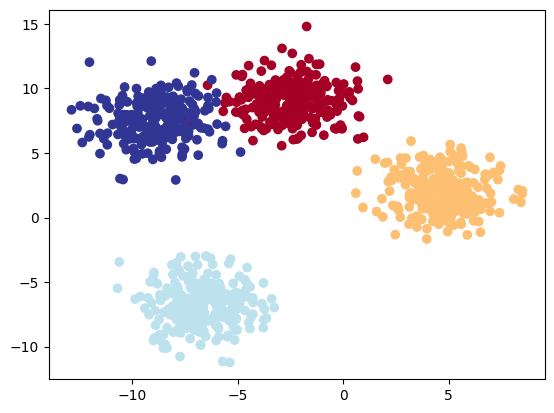

In [ ]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob,y_blob, test_size=0.2,random_state=42)

### 2.2. Building a model

In [ ]:
class blob_class(nn.Module):
  def __init__(self,input_dim=2,output_dim=4,hidden_neurons=10):
    super().__init__()

    self.layers=nn.Sequential(nn.Linear(in_features=input_dim, out_features=hidden_neurons), nn.ReLU(),nn.Linear(in_features=hidden_neurons, out_features=hidden_neurons), nn.ReLU(), nn.Linear(in_features=hidden_neurons, out_features=output_dim))

  def forward(self,x):
    return self.layers(x)

model_blob1=blob_class() # if the values are not set in the def__init  then we should assign values to variables here within the parenthesis.

In [ ]:
# yy=model_blob1(X_blob_test)
y_justtest=torch.softmax(model_blob1(X_blob_test),dim=1).argmax(dim=1)
print(y_justtest.shape)

torch.Size([200])


**defining Loss function and Optimizer:**

In [ ]:
Loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_blob1.parameters(),
                            lr=0.1)

**Train/Test Loop + calculating accuracy:**

In [ ]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model_blob1.train()
  y_preds=model_blob1(X_blob_train)
  Loss_tr=Loss_fn(y_preds,y_blob_train) # y_preds tensor shape: [800, 4]. y_blob_train tensor shape: [800]

  optimizer.zero_grad()
  Loss_tr.backward()
  optimizer.step()

  model_blob1.eval()
  with torch.inference_mode():
    y_pred_test=model_blob1(X_blob_test)
    y_pred_testreal=torch.softmax(y_pred_test,dim=1).argmax(dim=1)
    y_pred_trainreal=torch.softmax(y_preds,dim=1).argmax(dim=1)
    #acctest=acc_fn(y_pred_testreal,y_blob_test)
    #acctrain=acc_fn(y_pred_trainreal,y_blob_train)

  #if epoch %10==0:
   # print(f"train Loss :{Loss_tr} | train accuracy is {acctrain:.3f} % | test accuracy is : {acctest:.3f}%")





**Visualize Results:**

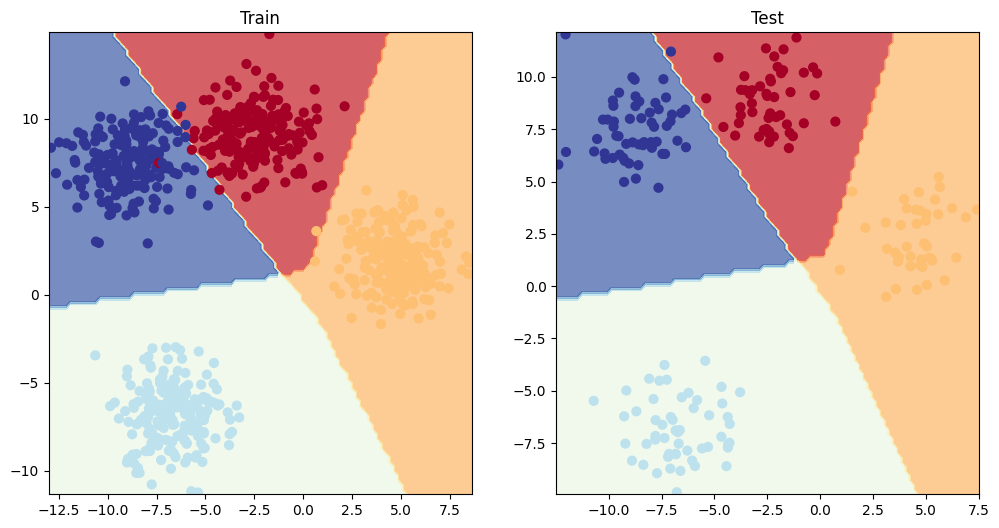

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob1, X_blob_test, y_blob_test)